---
numbering: false
---

# 2.1. Vectors

<!-- ```{hint} Learning Objectives
- Understand the definition of a vector.
- Understand the geometric interpretation of a vector.
- Understand the definition of vector addition and scalar multiplication.
- Understand the geometric interpretation of vector addition and scalar multiplication.
- Understand the definition of the norm of a vector.
- Understand the geometric interpretation of the norm of a vector.
- Understand the definition of the angle between two vectors.
``` -->

## Introduction

Vectors are **the** central object of study in linear algebra. At the culmination of Chapter 1, we briefly alluded to why vectors are relevant in machine learning – they are used to store data.

We'll start with the most basic and practically relevant definition of a vector. We'll introduce more abstract definitions later if we need them.

:::{note} Definition: Vector
A **vector** is an ordered list of numbers.

In this class, we'll typically use lowercase letters to denote vectors, drawn with arrows above the letters. For example:

$$\vec v = \begin{bmatrix} 4 \\ -3 \\ 15 \end{bmatrix}$$

In other classes or texts, you might see vectors written as boldface letters, like $\mathbf{v}$, or simply $v$.
:::

By _ordered list_, we mean that the order of the numbers in the vector matters. 
- For example, the vector $\vec v = \begin{bmatrix} 4 \\ -3 \\ 15 \end{bmatrix}$ is not the same as the vector $\vec w = \begin{bmatrix} 15 \\ -3 \\ 4 \end{bmatrix}$, even though they have the same components.
- $\vec v$ is also different from the vector $\vec u = \begin{bmatrix} 4 \\ -3 \\ 15 \\ 1 \end{bmatrix}$, even though their first three components are the same.

In general, we're mostly concerned with vectors in $\mathbb{R}^n$, which is the **set** of all vectors with $n$ **components** or **elements**, each of which is a real number. It's possible to consider vectors with complex components (the set of all vectors with complex components is denoted $\mathbb{C}^n$), but we'll stick to real vectors for now.

The vector $\vec v$ defined in the box above is in $\mathbb{R}^3$, which we can express as $\vec v \in \mathbb{R}^3$. This is pronounced as "v is an element of R three".

A general vector in $\mathbb{R}^n$ can be expressed in terms of its $n$ components:

$$\vec v = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix}$$

Subscripts can be used for different, sometimes conflicting purposes. In the definition of $\vec v$ above, the components of the vector are denoted $v_1, v_2, \ldots, v_n$. Each of these individual components is a **single** real number (i.e. a scalar), not a vector. But in the near future, we may want to consider multiple vectors at once, and may use subscripts to refer to them as well:

$$\vec v_1 = \begin{bmatrix} 4 \\ -3 \\ 15 \end{bmatrix}, \quad \vec v_2 = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$$

The meaning of the subscript depends on the context, so just be careful!

That's all great. **But, what do these numbers mean?** Vectors encode remarkable amounts of information and beauty, and shouldn't be thought of as "just" a list of numbers.

## Norm (i.e. Length or Magnitude)

In the context of physics, vectors are often described as creatures with "a magnitude and a direction". While this is not a physics class – this is EECS 245, after all! – this interpretation has some value for us too.

To illustrate what we mean, let's consider a concrete vector in $\mathbb{R}^2$, since it is easy to visualize vectors in 2 dimensions on a computer screen. Suppose $\vec v = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$. Then, we can visualize $\vec v$ as an arrow pointing from the origin $(0,0)$ to the point $(3,4)$ in the 2D Cartesian plane.

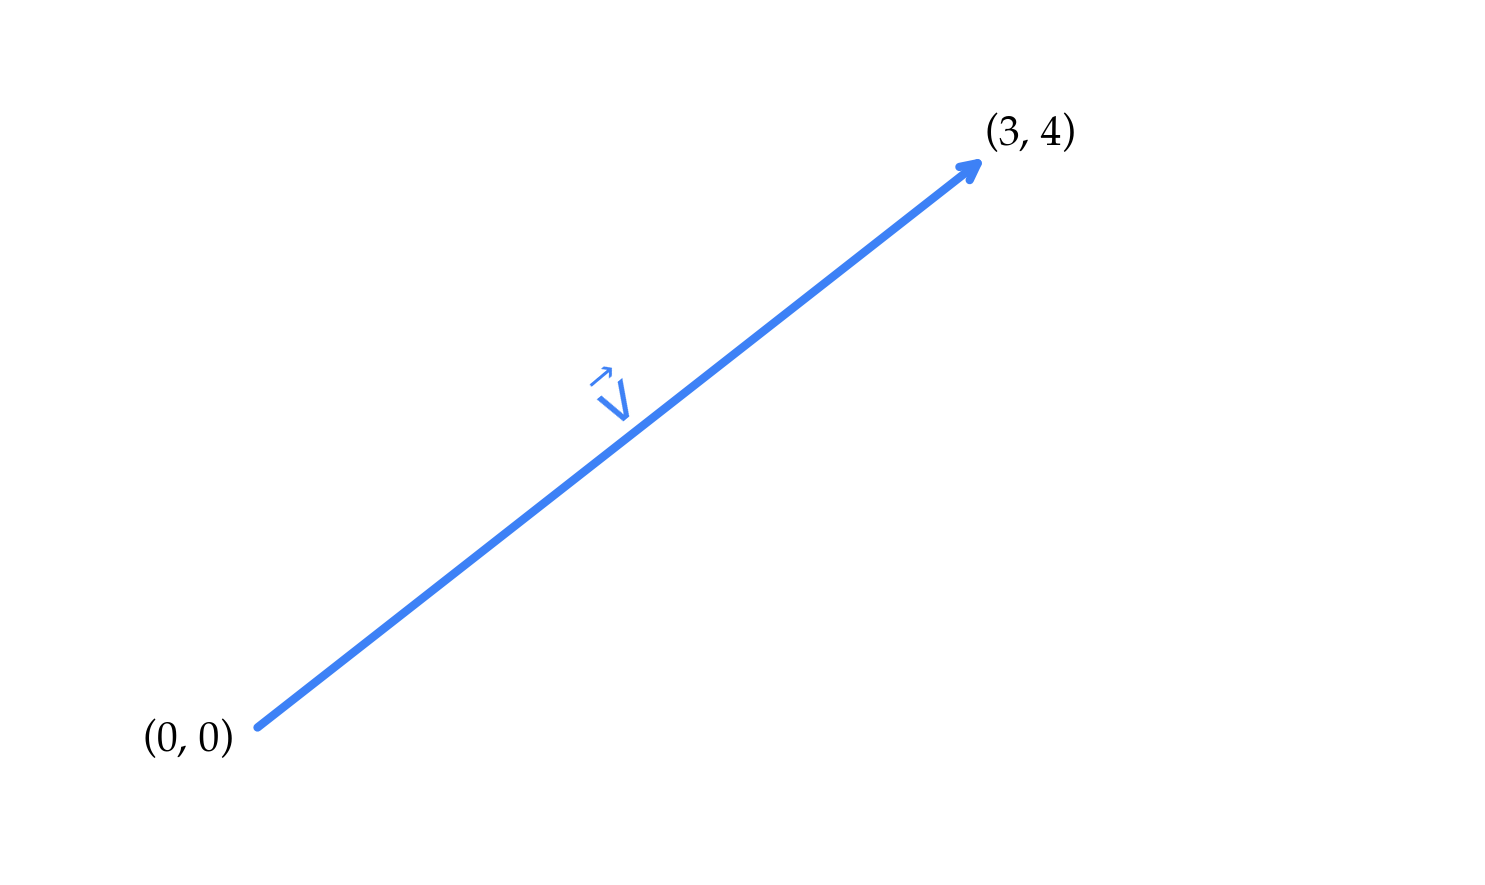

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Set font to Avenir globally
plt.rcParams['font.family'] = 'Palatino'

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

# Draw arrow from (0,0) to (3,4) with sharper tip
ax.annotate('', xy=(3, 4), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='#3d81f6', lw=4, 
                          mutation_scale=20, shrinkA=0, shrinkB=0))

# Add vector label along the arrow
# Calculate midpoint for label placement
mid_x, mid_y = 1.5, 2
ax.text(mid_x, mid_y, r'$\vec{v}$', fontsize=30, color='#3d81f6', 
        ha='center', va='bottom', rotation=40)

# Label the points (dots removed)
ax.text(-0.1, -0.25, '(0, 0)', fontsize=20, ha='right', va='bottom')
ax.text(3, 4, '(3, 4)', fontsize=20, ha='left', va='bottom')

# Set axis limits
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)

ax.set_xticks([])
ax.set_yticks([])

# Set background to white
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Add light grey gridlines
ax.grid(True, color='white', linestyle='-', linewidth=0.5)

# Color the x and y axes in darker grey
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

# Set axis labels
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)

# Make sure axes go through origin
# ax.axhline(y=0, color='white', linewidth=0.5)
# ax.axvline(x=0, color='white', linewidth=0.5)

# Set equal aspect ratio to maintain proper proportions
# ax.set_aspect('equal')

# Show the plot
plt.tight_layout()
plt.show()

The vector $\vec v = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$ moves 3 units to the right and 4 units up, which we know by reading the components of the vector.

It's worth noting that $\vec v$ isn't "fixed" to start at the origin – vectors don't have positions. All three vectors in the figure below are the same vector, $\vec v$.

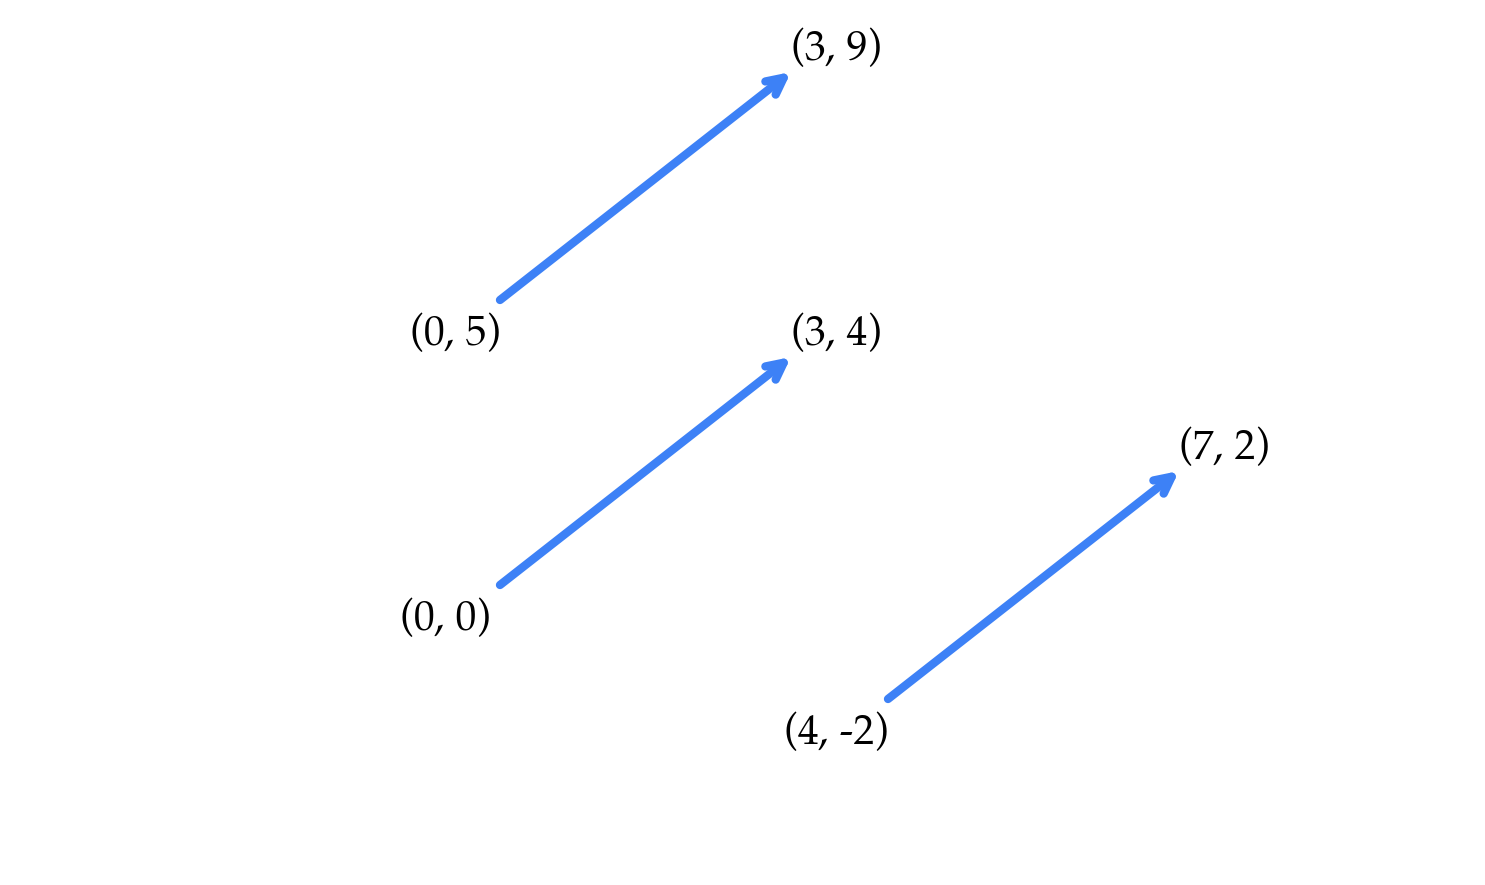

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Set font to Avenir globally
plt.rcParams['font.family'] = 'Palatino'

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

# Draw arrow from (0,0) to (3,4) with sharper tip
ax.annotate('', xy=(3, 4), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='#3d81f6', lw=4, 
                          mutation_scale=20, shrinkA=0, shrinkB=0))
ax.text(-0.1, -1, '(0, 0)', fontsize=20, ha='right', va='bottom')
ax.text(3, 4, '(3, 4)', fontsize=20, ha='left', va='bottom')

ax.annotate('', xy=(7, 2), xytext=(4, -2),
            arrowprops=dict(arrowstyle='->', color='#3d81f6', lw=4, 
                          mutation_scale=20, shrinkA=0, shrinkB=0))
ax.text(4, -3, '(4, -2)', fontsize=20, ha='right', va='bottom')
ax.text(7, 2, '(7, 2)', fontsize=20, ha='left', va='bottom')

ax.annotate('', xy=(3, 9), xytext=(0, 5),
            arrowprops=dict(arrowstyle='->', color='#3d81f6', lw=4, 
                          mutation_scale=20, shrinkA=0, shrinkB=0))
ax.text(0, 4, '(0, 5)', fontsize=20, ha='right', va='bottom')
ax.text(3, 9, '(3, 9)', fontsize=20, ha='left', va='bottom')

# Set axis limits
ax.set_xlim(-5, 10)
ax.set_ylim(-5, 10)

# Set background to white
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Add light grey gridlines
ax.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

# Color the x and y axes in darker grey
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

# Set axis labels
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)

ax.set_xticks([])
ax.set_yticks([])

# Make sure axes go through origin
# ax.axhline(y=0, color='darkgrey', linewidth=0.5)
# ax.axvline(x=0, color='darkgrey', linewidth=0.5)

# Set equal aspect ratio to maintain proper proportions
# ax.set_aspect('equal')

# Show the plot
plt.tight_layout()
plt.show()

To compute the length of $\vec v$ – i.e. the distance between $(0, 0)$ and $(3, 4)$ – we should remember the Pythagorean theorem, which states that if we have a right triangle with legs of length $a$ and $b$, then the length of the hypotenuse is $\sqrt{a^2 + b^2}$. Here, that's $\sqrt{3^2 + 4^2} = \sqrt{25} = 5$.

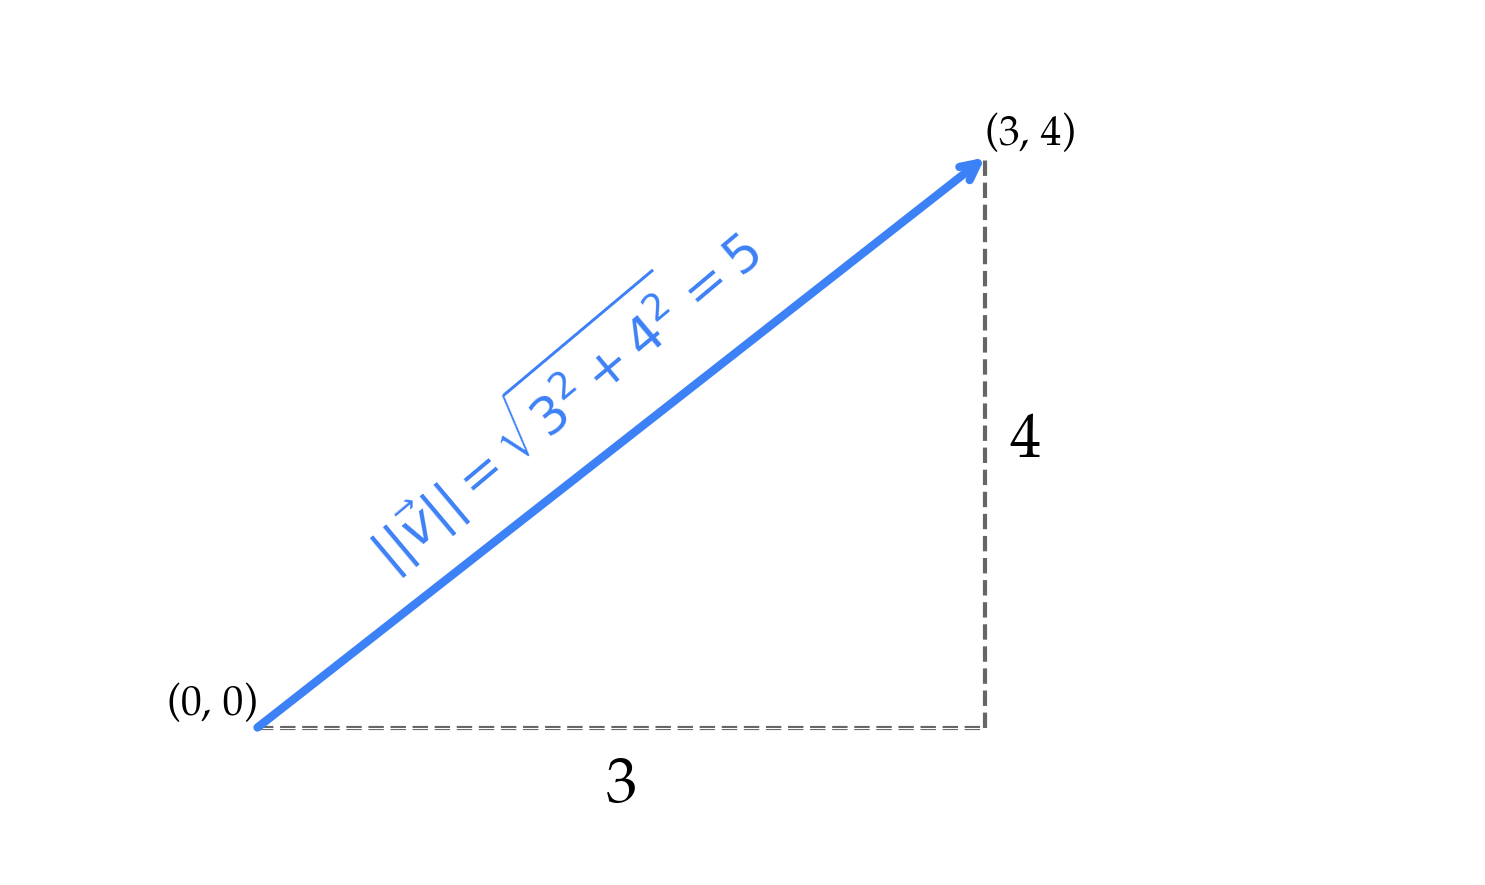

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Set font to Avenir globally
plt.rcParams['font.family'] = 'Palatino'

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

# Draw arrow from (0,0) to (3,4) with sharper tip
ax.annotate('', xy=(3, 4), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='#3d81f6', lw=4, 
                          mutation_scale=20, shrinkA=0, shrinkB=0))

# Add vector label along the arrow
# Calculate midpoint for label placement
mid_x, mid_y = 1.25, 1
ax.text(mid_x, mid_y, r'$|| \vec v || = \sqrt{3^2 + 4^2} = 5$', fontsize=25, color='#3d81f6', 
        ha='center', va='bottom', rotation=40)

# Add dotted lines for width and height components
# Horizontal line from (0,0) to (3,0) - width of 3
ax.plot([0, 3], [0, 0], 'k--', linewidth=2, alpha=0.6)
ax.text(1.5, -0.2, '3', fontsize=30, ha='center', va='top', color='black')

# Vertical line from (3,0) to (3,4) - height of 4  
ax.plot([3, 3], [0, 4], 'k--', linewidth=2, alpha=0.6)
ax.text(3.1, 2, '4', fontsize=30, ha='left', va='center', color='black')

# Label the points (dots removed)
ax.text(0, 0, '(0, 0)', fontsize=20, ha='right', va='bottom')
ax.text(3, 4, '(3, 4)', fontsize=20, ha='left', va='bottom')

# Set axis limits
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)

# Set background to white
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Add light grey gridlines
ax.grid(True, color='white', linestyle='-', linewidth=0.5)

# Color the x and y axes in darker grey
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

# Set axis labels
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)

ax.set_xticks([])
ax.set_yticks([])

# Make sure axes go through origin
ax.axhline(y=0, color='white', linewidth=0.5)
ax.axvline(x=0, color='white', linewidth=0.5)

# Set equal aspect ratio to maintain proper proportions
# ax.set_aspect('equal')

# Show the plot
plt.tight_layout()
plt.show()

:::{note} Definition: Vector Norm
The **norm** of a vector $\vec v \in \mathbb{R}^n$ is defined as follows:

$$\left\| \vec v \right\| = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2} = \sqrt{\sum_{i=1}^n v_i^2}$$

The norm of a vector is also called its **length** or **magnitude**. This particular formula for the norm is also called the **Euclidean norm** or $L_2$ norm, and is the most common and "default" norm used in linear algebra. 

In the future, we'll see other norms, which describe different ways of measuring the "length" of a vector.

:::

Note that the norm involves a sum of _squares_, much like mean _squared_ error 🤯.

What may not be immediately obvious is _why_ the Pythagorean theorem seems to extend to higher dimensions. The 2D case seems reasonable, but why is the length of the vector $\vec u = \begin{bmatrix} 6 \\ 2 \\ -3 \end{bmatrix}$ in $\mathbb{R}^3$ equal to $\sqrt{6^2 + 2^2 + (-3)^2}$?

In [119]:
import plotly.graph_objects as go
import numpy as np

# Define the vector u
u = np.array([6, 2, -3])

# Create the figure
fig = go.Figure()

# Draw the main vector u in blue
fig.add_trace(go.Scatter3d(
    x=[0, u[0]], y=[0, u[1]], z=[0, u[2]],
    mode='lines+markers',
    line=dict(color='blue', width=8),
    marker=dict(size=6, color='blue'),
    name='Vector u',
    showlegend=False
))

# Add text label for vector u using 3D scatter
fig.add_trace(go.Scatter3d(
    x=[u[0]/2], y=[u[1]/2], z=[u[2]/2],
    mode='text',
    text=[r'$\vec{u}$'],
    textfont=dict(size=20, color='blue'),
    showlegend=False
))

# Define the key points
points = {
    'Origin': [0, 0, 0],
    'Point (0,2,0)': [0, 2, 0],
    'Point (6,2,0)': [6, 2, 0],
    'Point (6,2,-3)': [6, 2, -3]
}

# Add labeled points
for label, point in points.items():
    fig.add_trace(go.Scatter3d(
        x=[point[0]], y=[point[1]], z=[point[2]],
        mode='markers+text',
        marker=dict(size=8, color='black'),
        text=[f'({point[0]}, {point[1]}, {point[2]})'],
        textposition='top center',
        textfont=dict(size=12),
        showlegend=False
    ))

# First triangle (in xy-plane): vertices (0,0,0), (6,0,0), (6,2,0), (0,2,0)
# This forms a rectangle, but the triangle is (0,0,0), (6,0,0), (6,2,0)
triangle1_x = [0, 6, 0]
triangle1_y = [0, 2, 2]
triangle1_z = [0, 0, 0]

fig.add_trace(go.Mesh3d(
    x=triangle1_x,
    y=triangle1_y,
    z=triangle1_z,
    color='lightblue',
    opacity=0.5,
    name='Triangle 1 (xy-plane)',
    showlegend=False
))

# Second triangle: vertices (0,0,0), (6,2,0), (6,2,-3)
triangle2_x = [0, 6, 6, 0]
triangle2_y = [0, 2, 2, 0]
triangle2_z = [0, 0, -3, 0]

fig.add_trace(go.Mesh3d(
    x=triangle2_x,
    y=triangle2_y,
    z=triangle2_z,
    color='lightcoral',
    opacity=0.5,
    name='Triangle 2 (vertical)',
    showlegend=False
))

# Add helper lines to show the triangles more clearly
# Lines for first triangle
fig.add_trace(go.Scatter3d(
    x=[0, 6, 6, 0, 0], y=[0, 0, 2, 2, 0], z=[0, 0, 0, 0, 0],
    mode='lines',
    line=dict(color='gray', width=3, dash='dash'),
    showlegend=False
))

# Lines for second triangle
fig.add_trace(go.Scatter3d(
    x=[0, 6, 6, 0], y=[0, 2, 2, 0], z=[0, 0, -3, 0],
    mode='lines',
    line=dict(color='gray', width=3, dash='dash'),
    showlegend=False
))

# Add axis lines to show coordinate system
fig.add_trace(go.Scatter3d(
    x=[0, 7], y=[0, 0], z=[0, 0],
    mode='lines',
    line=dict(color='black', width=2),
    showlegend=False
))

fig.add_trace(go.Scatter3d(
    x=[0, 0], y=[0, 3], z=[0, 0],
    mode='lines',
    line=dict(color='black', width=2),
    showlegend=False
))

fig.add_trace(go.Scatter3d(
    x=[0, 0], y=[0, 0], z=[-4, 1],
    mode='lines',
    line=dict(color='black', width=2),
    showlegend=False
))

# Update layout for white background and better visualization
fig.update_layout(
    scene=dict(
        xaxis=dict(
            title='X',
            backgroundcolor='white',
            gridcolor='lightgray',
            showbackground=True,
            zerolinecolor='black',
            range=[-1, 7]
        ),
        yaxis=dict(
            title='Y',
            backgroundcolor='white',
            gridcolor='lightgray',
            showbackground=True,
            zerolinecolor='black',
            range=[-1, 3]
        ),
        zaxis=dict(
            title='Z',
            backgroundcolor='white',
            gridcolor='lightgray',
            showbackground=True,
            zerolinecolor='black',
            range=[-4, 1]
        ),
        bgcolor='white',
        camera=dict(
            eye=dict(x=1.5, y=0.5, z=1.5)
        )
    ),
    # title='3D Vector u with Two Right Triangles',
    width=1000,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Show the plot
fig.show() 

There are actually two right angle triangles in the picture above:
- One triangle has legs of length 2 and 3, with a hypotenuse of $h$.
- Another triangle has legs of length $h$ and 6, with a hypotenuse of $\left\| \vec u \right\|$.

To find $\left\| \vec u \right\|$, we can use the Pythagorean theorem twice:

$$h^2 = 2^2 + (-3)^2 = 4 + 9 = 13 \implies h = \sqrt{13}$$

Then, we can use the Pythagorean theorem again to find $\left\| \vec u \right\|$:

$$\left\| \vec u \right\| = \sqrt{h^2 + 6^2} = \sqrt{\sqrt{2^2 + (-3)}^2 + 6^2} = \sqrt{2^2 + (-3)^2 + 6^2} = \sqrt{49} = 7$$

So, to find $\left\| \vec u \right\|$, we used the Pythagorean theorem twice, and ended up computing the square root of the sum of the squares of the components of the vector, which is what the definition above states. This argument naturally extends to higher dimensions.

```{warning} Length $\neq$ Number of Components

**Don't** confuse the length of a vector with the number of components in a vector!

If $\vec v \in \mathbb{R}^n$, then the length of $\vec v$ is $\lVert \vec v \rVert = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2}$, while the number of components in $\vec v$ is $n$.
```

Vector norms satisfy several interesting properties, which we will introduce shortly once we have more context.

## Vector Addition and Scalar Multiplication

Vectors support two core operations: addition and scalar multiplication. These two operations are core to the study of linear algebra – so much so, that sometimes vectors are defined abstractly as "things that can be added and multiplied by scalars".

:::{note} Definition: Vector Addition
Suppose $\vec u$ and $\vec v$ are both vectors with the same number of components, i.e. $\vec u, \vec v \in \mathbb{R}^n$.

Then, the **sum** of $\vec u$ and $\vec v$ is defined as follows:

$$\vec u + \vec v = \begin{bmatrix} u_1 \\ u_2 \\ \vdots \\ u_n \end{bmatrix} + \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix} = \begin{bmatrix} u_1 + v_1 \\ u_2 + v_2 \\ \vdots \\ u_n + v_n \end{bmatrix}$$
:::

This tells us that vector addition is performed **element-wise**. This is a term that you'll encounter quite a bit in the context of writing `numpy` code, as you'll see in lab.

For example, if $\vec u = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$ and $\vec v = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}$, then $\vec u + \vec v = \begin{bmatrix} 5 \\ 7 \\ 9 \end{bmatrix}$. 

If $\vec w = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$, then $\vec u + \vec w$ is undefined, since $\vec u$ and $\vec w$ have different numbers of components.

<br>

:::{note} Definition: Scalar Multiplication
Suppose $\vec v \in \mathbb{R}^n$. The **scalar multiple** of $\vec v$ by a scalar $c \in \mathbb{R}$ is defined as follows:

$$c \vec v = c \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix} = \begin{bmatrix} c v_1 \\ c v_2 \\ \vdots \\ c v_n \end{bmatrix}$$
:::

For example, if $\vec v = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$ and $c = 2$, then $2 \vec v = \begin{bmatrix} 2 \\ 4 \\ 6 \end{bmatrix}$. Note that we've deliberately defined this operation as **scalar** multiplication, not just "multiplication" in general, as there's more nuance to the definition of multiplication in linear algebra.

The norm of a vector satisfies the following properties, which you should verify for yourself:

- $\lVert \vec v \rVert \geq 0$.
- $\lVert \vec v \rVert = 0$ if and only if $\vec v = \vec 0 = \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}$.
- $\lVert c \vec v \rVert = |c| \lVert \vec v \rVert$ for all $c \in \mathbb{R}$.
- $\lVert \vec u + \vec v \rVert \leq \lVert \vec u \rVert + \lVert \vec v \rVert$ (called the **triangle inequality**; the proof of this is non-trivial, and we'll see it later in a homework assignment).


<!-- 
:::{note} Definition: Zero Vector
The **zero vector** is the vector with all components equal to 0.

$$\vec 0 = \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}$$
:::

 -->

## Visualizing Addition and Scalar Multiplication

In [102]:
import plotly.graph_objects as go
import numpy as np

# Define the vectors
v1 = np.array([1, 2])
v2 = np.array([3, 5])

# Calculate angle between vectors (in radians)
theta = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

# Create figure
fig = go.Figure()

# Add vector (1,2) in red
fig.add_trace(go.Scatter(x=[0, v1[0]], y=[0, v1[1]], 
                         mode='lines+markers', 
                         line=dict(color='red', width=2),
                         name='Vector (1,2)'))

# Add vector (3,5) in blue
fig.add_trace(go.Scatter(x=[0, v2[0]], y=[0, v2[1]], 
                         mode='lines+markers', 
                         line=dict(color='blue', width=2),
                         name='Vector (3,5)'))

# Add angle annotation
# fig.add_annotation(
#     x=0.5, y=1.5,
#     text=r'$\theta$',
#     showarrow=False,
#     font=dict(size=16)
# )

# Set layout
fig.update_layout(
    xaxis=dict(range=[-1, 6], showgrid=False, zeroline=False),
    yaxis=dict(range=[-1, 6], showgrid=False, zeroline=False),
    width=600,
    height=600,
    showlegend=True
)

fig.show()

## More on Norms

- Norm properties
- L2 norm ball, L1 norm ball, both in R2 and R3

TODO important enough that it's worth mentioning -> Triangle Inequality.